# HW03
In this assignment, you will learn how to visualize data using seaborn and matplotlib.<br> Futhermore, you will be able to learn how to visualize high-dimensinal data using t-SNE.<br>


Please write down your code between <br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# BEGIN_YOUR_CODE**<br>
&nbsp;&nbsp;&nbsp;&nbsp; and<br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# END_YOUR_CODE**.<br>
When submitting, rename the file to HW03_[student_id].ipynb (ex.HW03_20211234.ipynb) and submit it to PLMS.

In [1]:
# DO NOT import any external libraries other than these.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
%matplotlib inline

## 1. Seaborn

In problem 1, the visualization must be done using seaborn.<br>
(Do not use matplotlib or any kind of visualization library to draw the plot.)

Load the dataset `premier.csv`.

Here's what the column names indicate:
- Pos: position of the player
- MP: matches played
- Min: minutes played
- Gls: goals scored or allowed
- Ast: assists
- PK: penaly kicks made
- CrdY: Yellow Cards
- CrdR: Red Cards

In [2]:
# BEGIN_YOUR_CODE
df = pd.read_csv('premier.csv', encoding='latin1')
# END_YOUR_CODE
df.head()

,Player,Team,Nation,Pos,Age,MP,Min,Gls,Ast,PK,CrdY,CrdR
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,2978.0,11.0,7.0,2.0,6.0,0.0
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,3063.0,5.0,0.0,0.0,8.0,1.0
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,3060.0,0.0,0.0,0.0,1.0,0.0
3,Ben White,Arsenal,eng ENG,DF,23.0,32,2880.0,0.0,0.0,0.0,3.0,0.0
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,2785.0,7.0,4.0,0.0,4.0,0.0


### a. Preprocessing
Before we start the visualization, let's go through a series of preprocessing steps.<br>
First, replace nan values in `Age` with mean of a column.

In [3]:
df['Age'].mean()

24.490538573508005

In [4]:
# BEGIN_YOUR_CODE
# 모든 테이블에서 결측값을 채울 시 'df.fillna(0)'과 같이 처리!
df.fillna({'Age': df['Age'].mean()}, inplace=True)
# END_YOUR_CODE

Then, delete the rows with nan values.

In [5]:
# BEGIN_YOUR_CODE
# df.dropna()는 결측값을 포함한 row 또는 column들을 제거한다.
# axis(0)은 row, axis(1)은 column.
df.dropna(axis=0, inplace=True)
# END_YOUR_CODE

Next, let's keep only the first position in the `Pos` column.<br>
For instance, if the original value is `FW, MF`, you should keep `FW`.<br>
Hint: try using pd.apply

In [6]:
# BEGIN_YOUR_CODE
# df.apply('function', 'axis')를 실행 시 테이블의 row혹은 column들에 function을 적용한다.
# row들에 적용하면 그 결과는 column 단위로 출력된다. (ex. np.sum)
# 다음과 같이 특정 column을 찍어서 apply 적용 시 해당 열의 element들에 각각 function을 적용한다.
# [Python] string.split()시 인자로 받은 문자를 기준으로 문자열을 parsing한 배열을 반환한다.
df['Pos'] = df['Pos'].apply(lambda x: x.split(',')[0])
# END_YOUR_CODE
df.head()
# 'Pos' column의 값이 정상적은 변결되었다.

,Player,Team,Nation,Pos,Age,MP,Min,Gls,Ast,PK,CrdY,CrdR
0,Bukayo Saka,Arsenal,eng ENG,FW,19.0,38,2978.0,11.0,7.0,2.0,6.0,0.0
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,3063.0,5.0,0.0,0.0,8.0,1.0
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,3060.0,0.0,0.0,0.0,1.0,0.0
3,Ben White,Arsenal,eng ENG,DF,23.0,32,2880.0,0.0,0.0,0.0,3.0,0.0
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,2785.0,7.0,4.0,0.0,4.0,0.0


Lastly, create a new column named `Gls_Y` with a value of 0 (if the player has not scored or allowd a goal) or 1 (otherwise).

In [7]:
# BEGIN_YOUR_CODE
# Pandas dataframe에 column 추가 시 해당 column 이름으로 참조 후 초기화한다.
# [Python] 삼항연산자 '참일 때의 반환값' if '조건식' else '거짓일 때의 반환값'
df['Gls_Y'] = df['Gls'].apply(lambda x: 0 if x == 0 else 1)
# END_YOUR_CODE
df.head()

,Player,Team,Nation,Pos,Age,MP,Min,Gls,Ast,PK,CrdY,CrdR,Gls_Y
0,Bukayo Saka,Arsenal,eng ENG,FW,19.0,38,2978.0,11.0,7.0,2.0,6.0,0.0,1
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,3063.0,5.0,0.0,0.0,8.0,1.0,1
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,3060.0,0.0,0.0,0.0,1.0,0.0,0
3,Ben White,Arsenal,eng ENG,DF,23.0,32,2880.0,0.0,0.0,0.0,3.0,0.0,0
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,2785.0,7.0,4.0,0.0,4.0,0.0,1


Save the dataframe into `premier_final.csv`.<br>
Do not write the index as a column.

In [8]:
# BEGIN_YOUR_CODE
# index(True)시 인덱스에 대한 column이 추가된다.
df.to_csv('premier_final.csv', index=False)
# END_YOUR_CODE

### b. Visualization
For now, we will visualize the data to get a more comprehensive understanding.<br>
First, we would like to obtain the age distribution of the players.<br>
Create a set of subplots with the histogram of age on the left and the density plot of age on the right.

<AxesSubplot:xlabel='Age', ylabel='Density'>

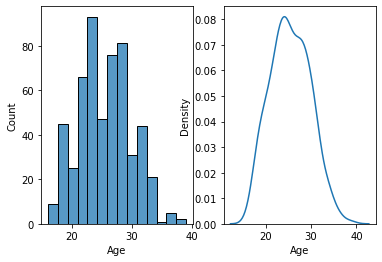

In [9]:
# BEGIN_YOUR_CODE
# plt.subplots('row 수', 'column 수')
# 반환값 중 axes는 배열과 같이 참조해 해당 plot에 drawing한다.
fig, axes = plt.subplots(1, 2)

# [histogram] sns.histplot('data', '특정 column', 'drawing할 plot')
# 특정 column을 x(y)에 인가하며 histogram의 축이 가로(세로)가 된다.
sns.histplot(data=df, x='Age', ax=axes[0])
# [KDE plot] sns.kdeplot('data', '특정 column', 'drawing할 plot')
sns.kdeplot(data=df, x='Age', ax=axes[1])
# END_YOUR_CODE

Now, we want to compare the age distribution of each team.<br>
Draw a age boxplot for each team.

<AxesSubplot:xlabel='Age', ylabel='Team'>

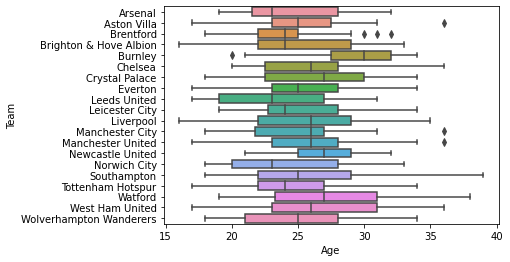

In [10]:
# BEGIN_YOUR_CODE
# [box plot] sns.boxplot('data', 'x축', 'y축')
# y축 별 x의 box plot을 도출할 수 있다.
sns.boxplot(data=df, x='Age', y='Team')
# END_YOUR_CODE

Based on the results, which team has the youngest player?<br>
Answer: Liverpool and Brighton & Hove Albion

In [ ]:
df.sort_values(by=['Age'])

Then, let's check the age of each position.<br>
Draw a barplot where x is each position and y represents the mean of the age.

<AxesSubplot:xlabel='Pos', ylabel='Age'>

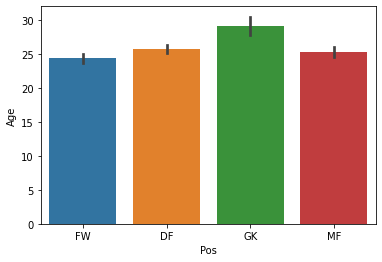

In [11]:
# BEGIN_YOUR_CODE
# [bar plot] sns.barplot('data', 'x축', 'y축')
# x축 별 y의 bar plot을 도출할 수 있다.
sns.barplot(data=df, x='Pos', y='Age')
# END_YOUR_CODE

In [12]:
df.groupby(['Pos']).mean()

,Age,MP,Min,Gls,Ast,PK,CrdY,CrdR,Gls_Y
Pos,,,,,,,,,
DF,25.680412,18.850515,1492.927835,0.809278,0.989691,0.000000,2.927835,0.128866,0.463918
FW,24.312500,19.458333,1196.916667,4.083333,2.076389,0.416667,1.937500,0.055556,0.722222
GK,29.071429,18.166667,1628.547619,0.000000,0.071429,0.000000,0.880952,0.023810,0.000000
MF,25.259036,19.656627,1329.698795,1.759036,1.512048,0.144578,2.746988,0.054217,0.536145


It seems like goal keepers are relatively old compared to other positions.<br>
Next, we would like to see if the player who scored (or allowed) played more **matches** than the player who did not.<br>
You want to check if it is true for **all teams**.<br>
Draw a stripplot to verify this.

<AxesSubplot:xlabel='Gls_Y', ylabel='MP'>

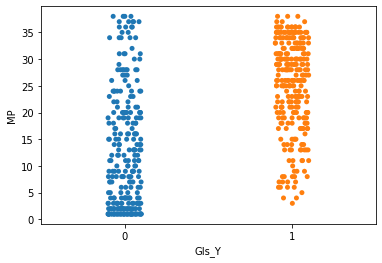

In [13]:
# BEGIN_YOUR_CODE
# [strip plot (scatter plot)] sns.stripplot('data', 'x축', 'y축')
# y축 별 x의 strip plot을 도출할 수 있다.
sns.stripplot(data=df, x='Gls_Y', y='MP')
# END_YOUR_CODE

It seems that the player who scores the goal plays in more matches!<br>
Now, let's look at whether there is a correlation between age and **play time**. Draw a Jointplot for this.

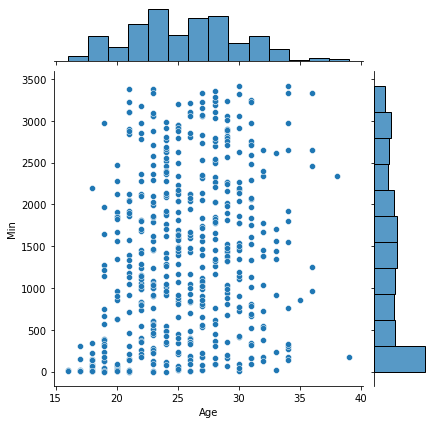

In [14]:
# BEGIN_YOUR_CODE
# [joint plot] sns.jointplot('data', 'x축', 'y축')
# x축과 y축 variable 사이의 상관관계를 유추할 수 있는 scatter plot을 도출한다.
sns.jointplot(data=df, x='Age', y='Min')
# END_YOUR_CODE

Seems like there not much correlation between the age and playtime.<br>
Add `Gls_Y` as hue to the code above.

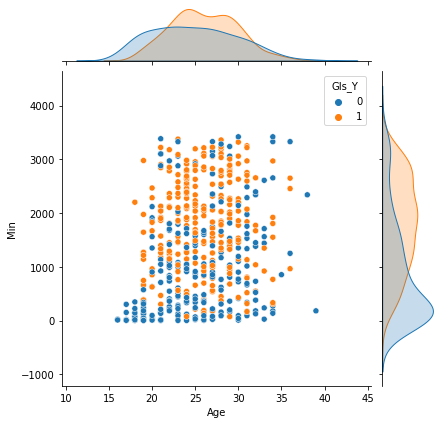

In [15]:
# BEGIN_YOUR_CODE
sns.jointplot(data=df, x='Age', y='Min', hue='Gls_Y')
# END_YOUR_CODE

We still can't find a clear correlations, but it does show a more detailed analysis.<br>
Lastly, let's check the difference in playtime for each position.<br>
Plot the kernel density estimation plot of playtime for each position.

<AxesSubplot:xlabel='Min', ylabel='Density'>

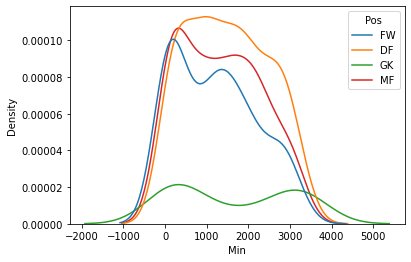

In [17]:
# BEGIN_YOUR_CODE
# kde plot에 hue 추가 시 각 hue별 kde plot을 얻을 수 있다.
sns.kdeplot(data=df, x='Min', hue='Pos')
# END_YOUR_CODE

You have finished all of the seaborn problems. Well done!

## 2. Matplotlib
In problem 2, the visualization must be done using matplotlib.<br>
(Do not use seaborn or any kind of visualization library to draw the plot.)

### a. Basic plot 1
Draw sine and cosine graphs of X on one figure.<br>
The sine graph should have a width of 1 and a solid red line.<br>
On the other hand, the cosine graph should have a width of 2 with a blue dashed line.

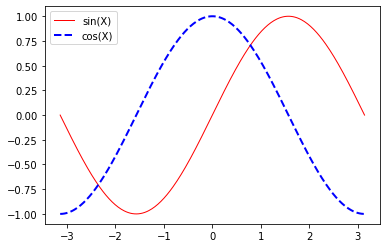

In [18]:
X = np.linspace(-np.pi, np.pi, 300)
# BEGIN_YOUR_CODE
Y = np.sin(X)
Z = np.cos(X)

# [matplotlob의 plot] plt.plot('x', 'f(x)', 'linewidth', 'color', 'linestyle')
# plt.plot을 연속으로 하면 하나의 canvas에 plotting한다.
plt.plot(X, Y, linewidth=1, linestyle='solid', color='red')
plt.plot(X, Z, linewidth=2, linestyle='dashed', color='blue')
# plotting 순서대로 naming
plt.legend(['sin(X)', 'cos(X)'])
# print plot
plt.show()
# END_YOUR_CODE

### b. Basic plot 2
Next, we will draw two subplots with one row and two columns.<br>
Draw **line graph** of $y=x^2$ on the left.<br>
Set title as "Polynomial Functions".<br>
On the right, draw **scatter plot** of $y=-x^2$.<br>
Set title as "Polynomial Functions" and set the range of x to (-10, 10).


(-10.0, 10.0)

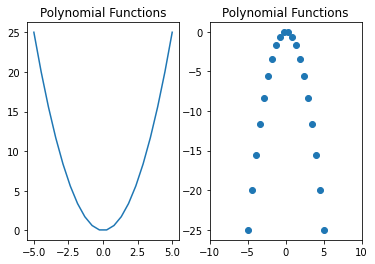

In [20]:
x = np.linspace(-5,5,20)
# BEGIN_YOUR_CODE
y1 = x ** 2
y2 = -1 * (x ** 2)

fig, axes = plt.subplots(1, 2)

axes[0].set_title("Polynomial Functions")
axes[0].plot(x, y1)

axes[1].set_title("Polynomial Functions")
axes[1].scatter(x, y2)
axes[1].set_xlim((-10, 10))
# END_YOUR_CODE

### c. Quantile plot
Here, we will draw a quantile plot of a normal distribution.<br>
$a$ is a sample taken from a normal distribution.<br>
First, compute the $qth$ percentile(s) of the sample.<br>
Then, draw a quantile plot.

In [23]:
a = np.random.normal(5,5,250) # random.normal(mean, std, size of sample)
q = np.linspace(0,100,21)

np.percentile(a, q)

array([-10.33955261,  -3.08451751,  -1.53260374,  -0.3235748 ,
         0.79766788,   1.87721232,   2.42680913,   3.35259086,
         3.83994673,   4.12292445,   5.08970303,   5.55199311,
         6.23391048,   6.95697667,   7.54308024,   8.25838237,
         9.20602182,   9.75620795,  10.64724697,  12.34757543,
        17.07950035])

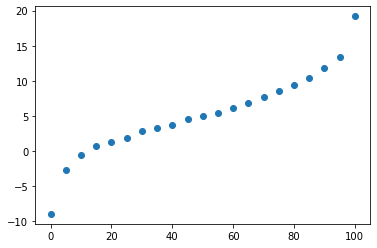

In [24]:
a = np.random.normal(5,5,250) # random.normal(mean, std, size of sample)

q = np.linspace(0,100,21)
# BEGIN_YOUR_CODE
# [percentile] np.percentile('input array', 'percentile을 계산하기 위한 0~100의 sequence')
# interploation으로 method를 지정한다.
plt.scatter(q, np.percentile(a, q, interpolation='nearest'))
# END_YOUR_CODE

Then, let's check if the Rayleigh distribution follows a normal distribution.<br>
First, compute the $qth$ percentile(s) of the sample for each distribution.<br>
Then, draw a Q-Q plot.
Label the x and y axis as 'Branch A (normal)' and 'Branch B (rayleigh)', respectively.

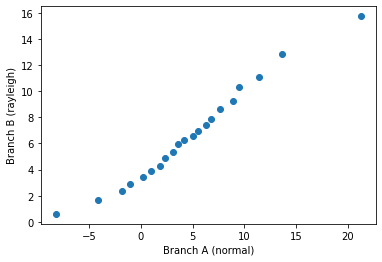

In [25]:
a = np.random.normal(5,5,250) # random.normal(mean, std, size of sample)
b = np.random.rayleigh(5,250)

q = np.linspace(0,100,21)
# BEGIN_YOUR_CODE
q_a = np.percentile(a, q, interpolation='nearest')
q_b = np.percentile(b, q, interpolation='nearest')

plt.plot(q_a, q_b, 'o')
plt.xlabel("Branch A (normal)")
plt.ylabel("Branch B (rayleigh)")
# END_YOUR_CODE

# do not change the line below.
# x = np.linspace(np.min((quantile_a.min(),quantile_b.min())), np.max((quantile_a.max(),quantile_b.max())))
# plt.plot(x,x, color='k', ls='--')  # k is black

plt.show()

## 3. t-SNE

Run the cell below to load the wine dataset.

reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine 

In [26]:
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
wine_df, target = data['data'], data['target']
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
wine_df

Now, let's visualize data using t-SNE!<br>
Execute dimensionality reduction using t-SNE. The size of the reduced dimension is 2.<br>
Print a dataframe `tsne_df` with column names 'component 0' and 'component 1', each row representing the output of tsne.

In [27]:
# BEGIN_YOUR_CODE
model = TSNE(n_components=2, learning_rate='auto', init='random')
tsne_df = pd.DataFrame(model.fit_transform(wine_df))
tsne_df.columns = ["component 0", "component 1"]
# END_YOUR_CODE
tsne_df.head()

,component 0,component 1
0,-10.110648,2.813804
1,-9.760952,2.771115
2,-12.098986,3.808218
3,-14.787625,4.736876
4,-1.596457,0.613911


Well done! Visualize the results by running the cell below.

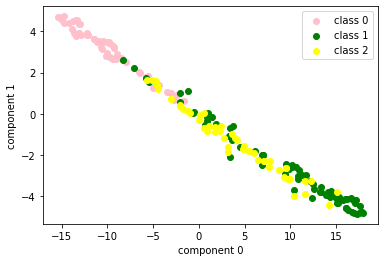

In [28]:
tsne_df['target'] = target

tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'class 0')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'green', label = 'class 1')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'class 2')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

Uh-oh. It seems like something is wrong. We might need to preprocess the data.

First, let's see if there's is a correlation between the variables.<br>
Plot a scatterplot with figsize (10,10) for each pairing of the variables using seaborn.<br>

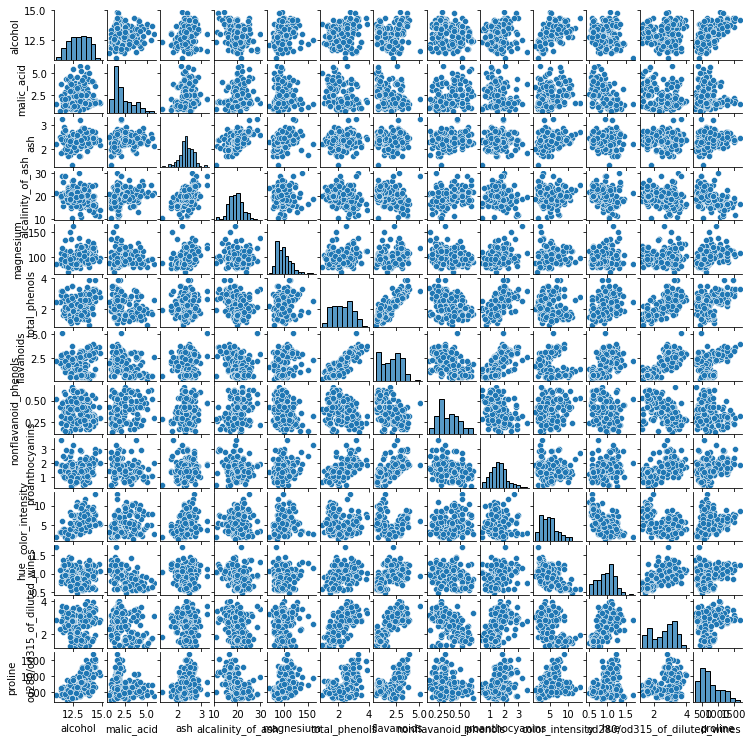

In [29]:
p = sns.pairplot(data=wine_df)
p.fig.set_size_inches(10, 10)

There seems to be a correlation between several variables, but it is unclear which one is which.<br>
Plot a heatmap of correlations using seaborn.<br>

In [ ]:
wine_df.corr()

<AxesSubplot:>

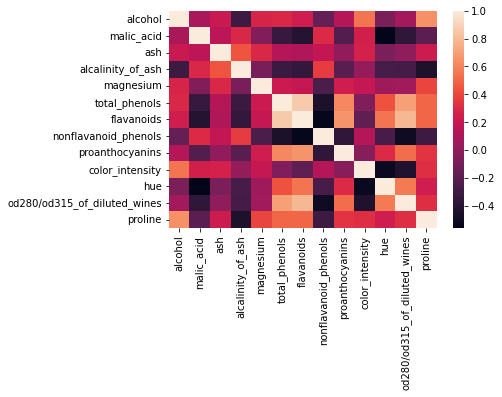

In [30]:
# BEGIN_YOUR_CODE
# df.corr() : table 변수 간의 correlation을 반환한다.
sns.heatmap(wine_df.corr())
# END_YOUR_CODE

In [ ]:
wine_df.corr().unstack()['malic_acid'].sort_values()

# x-axis 기준으로 유사한 correlation을 나타내는 column들 찾ㄱ! 

There seems to be a high correlation across multiple variables.<br>
Let's drop column names `malic_acid`, `alcalinity_of_ash`, and `nonflavanoid_phenols` which seems to be highly correlated with other variables.

In [31]:
# BEGIN_YOUR_CODE
# df.drop(['labels'], axis)
wine_df = wine_df.drop(['malic_acid', 'alcalinity_of_ash', 'nonflavanoid_phenols'], axis=1)
# END_YOUR_CODE
wine_df.head()

,alcohol,ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,2.43,127.0,2.80,3.06,2.29,5.64,1.04,3.92,1065.0
1,13.20,2.14,100.0,2.65,2.76,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.67,101.0,2.80,3.24,2.81,5.68,1.03,3.17,1185.0
3,14.37,2.50,113.0,3.85,3.49,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.87,118.0,2.80,2.69,1.82,4.32,1.04,2.93,735.0


The, let's min-max normalize the values.

In [32]:
from sklearn import preprocessing

# BEGIN_YOUR_CODE
scaler = preprocessing.MinMaxScaler()
normalized_wine_df = pd.DataFrame(scaler.fit_transform(wine_df))
# column 명이 다 날라가기 때문에 별도로 지정해줘야 한다.
normalized_wine_df.columns = wine_df.columns.values

wine_df = normalized_wine_df
# END_YOUR_CODE

In [ ]:
normalized_wine_df

Finally, let's run the t-SNE again with preprocessed data.<br>
Execute dimensionality reduction using t-SNE. The size of the reduced dimension is 2.<br>
Print a dataframe `tsne_df` with column names 'component_0' and 'component_1', each row representing the output of tsne.

In [33]:
# BEGIN_YOUR_CODE
model = TSNE(n_components=2, learning_rate='auto', init='random')
tsne_df = pd.DataFrame(model.fit_transform(wine_df))
tsne_df.columns = ["component 0", "component 1"]
# END_YOUR_CODE
tsne_df.head()

,component 0,component 1
0,2.519203,-11.627740
1,5.104719,-7.852733
2,5.166813,-12.757642
3,6.085157,-14.257162
4,2.274914,-7.832375


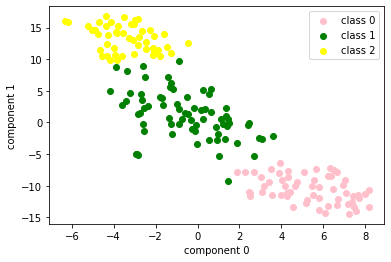

In [34]:
# class target 정보 불러오기 
tsne_df['target'] = target

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'class 0')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'green', label = 'class 1')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'class 2')


plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

The results seem to be much better!<br>
Now we can see each class clearly separated.<br>
Remenber that preprocessing is super important.